In [ ]:
# исследуется набор данных с информацией о домах городов: прогнозируется медианная стоимость домов

In [1]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


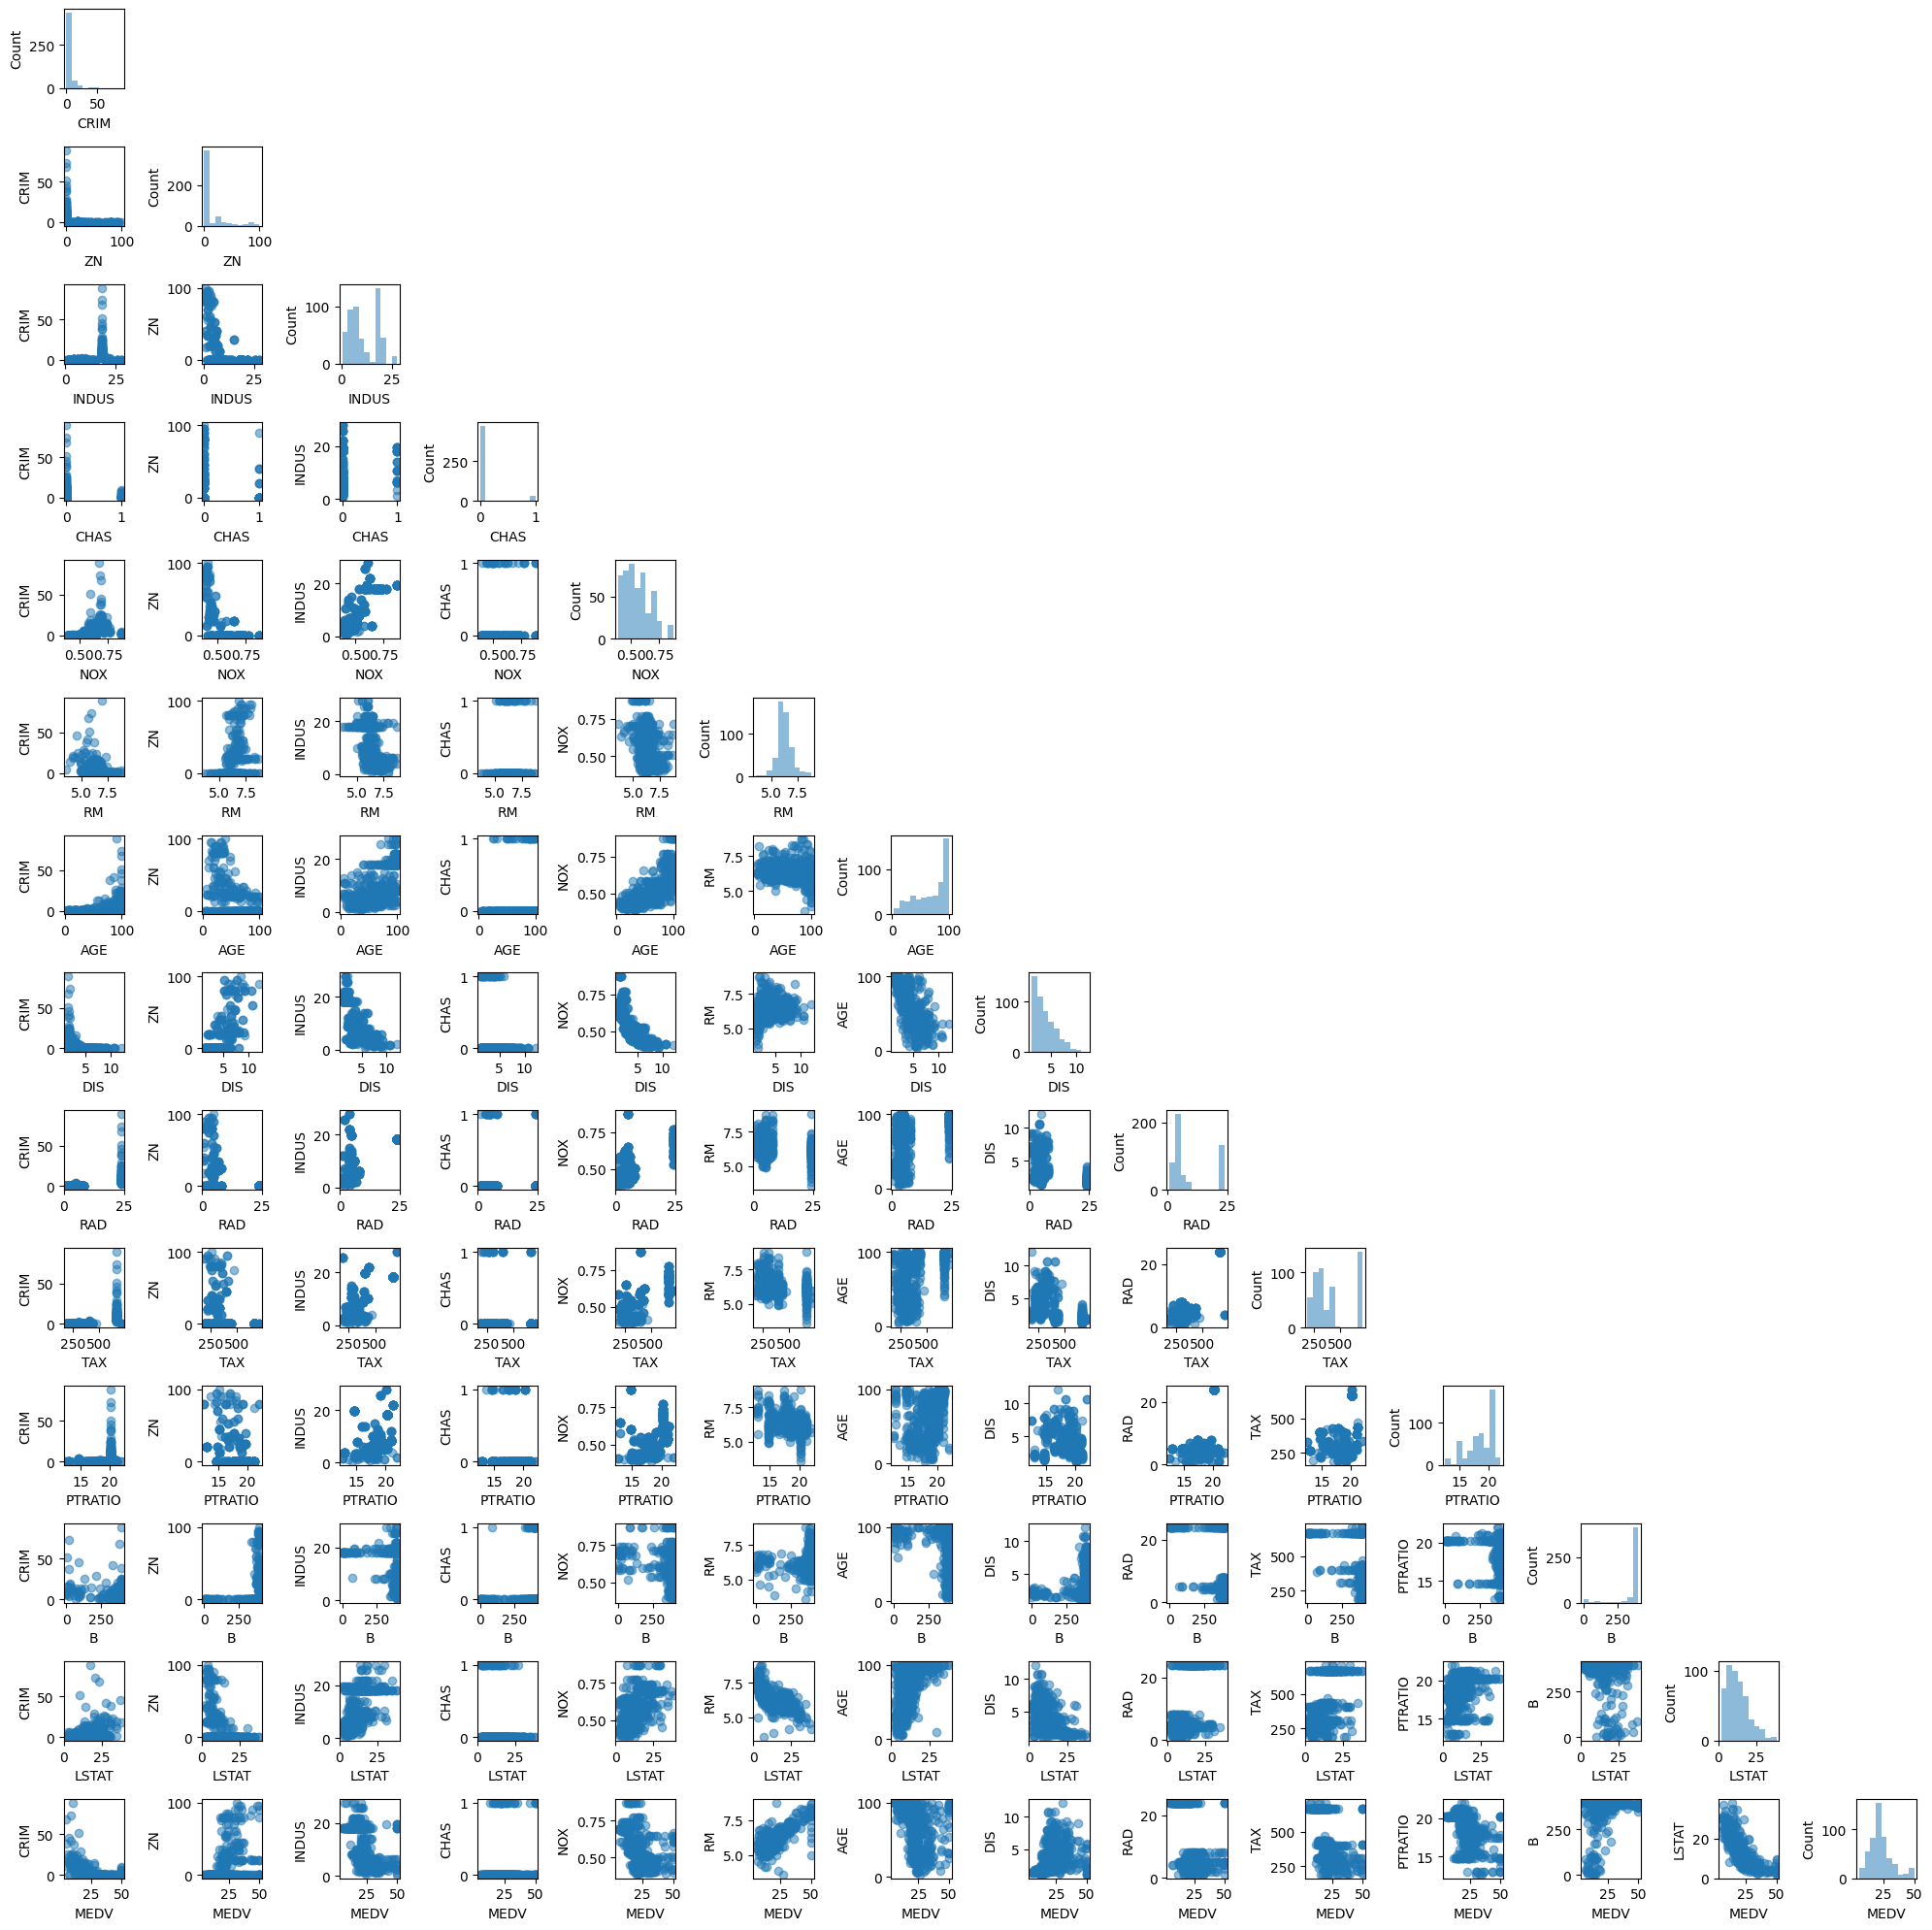

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix


cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
        'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(20,20), 
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

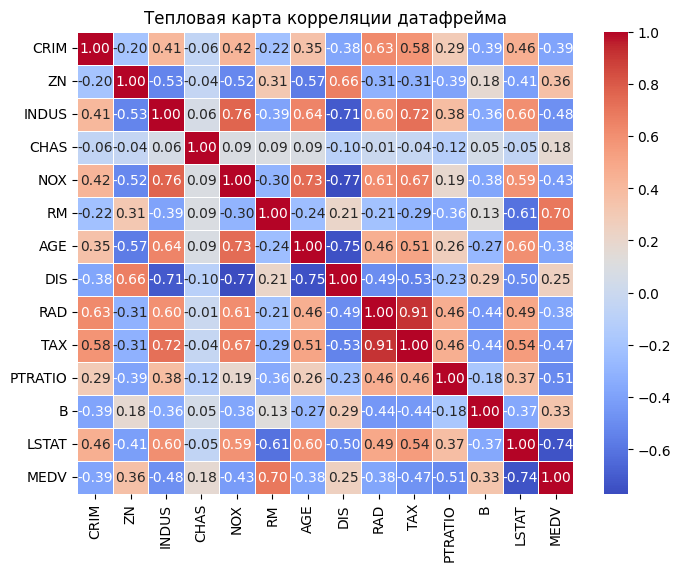

In [17]:
import numpy as np
import seaborn as sns


corr_matrix = df[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляции датафрейма')
plt.show()

In [18]:
import numpy as np


class LinearRegressionGD(object):
  
  def __init__(self, eta=0.001, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter
    
  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return self.net_input(X)


In [19]:
from sklearn.preprocessing import StandardScaler


X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
"""
Большинство преобразователей в scikit-learn ожидают, что данные хранятся в двумерных массивах. 
В предыдущем примере кода с использованием np.newaxis в у[:, np.newaxis] к массиву добавляется новое измерение. 
Затем после того, как StandardScaler возвратит масштабированную переменную, для удобства мы преобразуем
ее в исходное представление в виде одномерного массива, применяя метод flatten(). 
"""
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

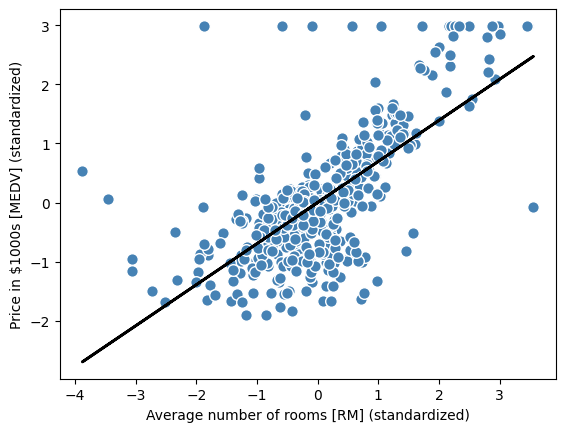

In [20]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [33]:
# но в данном случае мы видим стандартизированные значения признака, а чтобы вернуть исходные при прогнозе
# можно использовать такой код

num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print(f"Цена: {round(sc_y.inverse_transform(price_std.reshape(-1, 1))[0][0], 3) * 1000}$")

Цена: 10840.0$
